In [1]:
# Import all reuqired libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the required data set
shared_bike_data = pd.read_csv(r"Data_set\day.csv")
shared_bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Check for any null values in the dataset
shared_bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


In [4]:
# Get more statiscal information related to data set
shared_bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


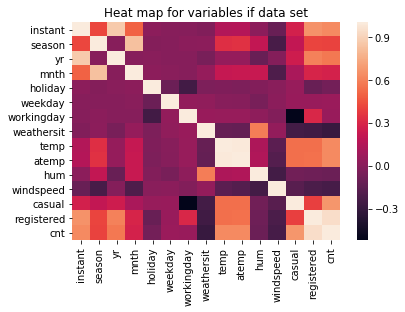

In [5]:
# Check heatmap of the dataset for the correlation related information
heat_map_bike_data = sns.heatmap(shared_bike_data.corr())
plt.title("Heat map for variables if data set")
plt.show()

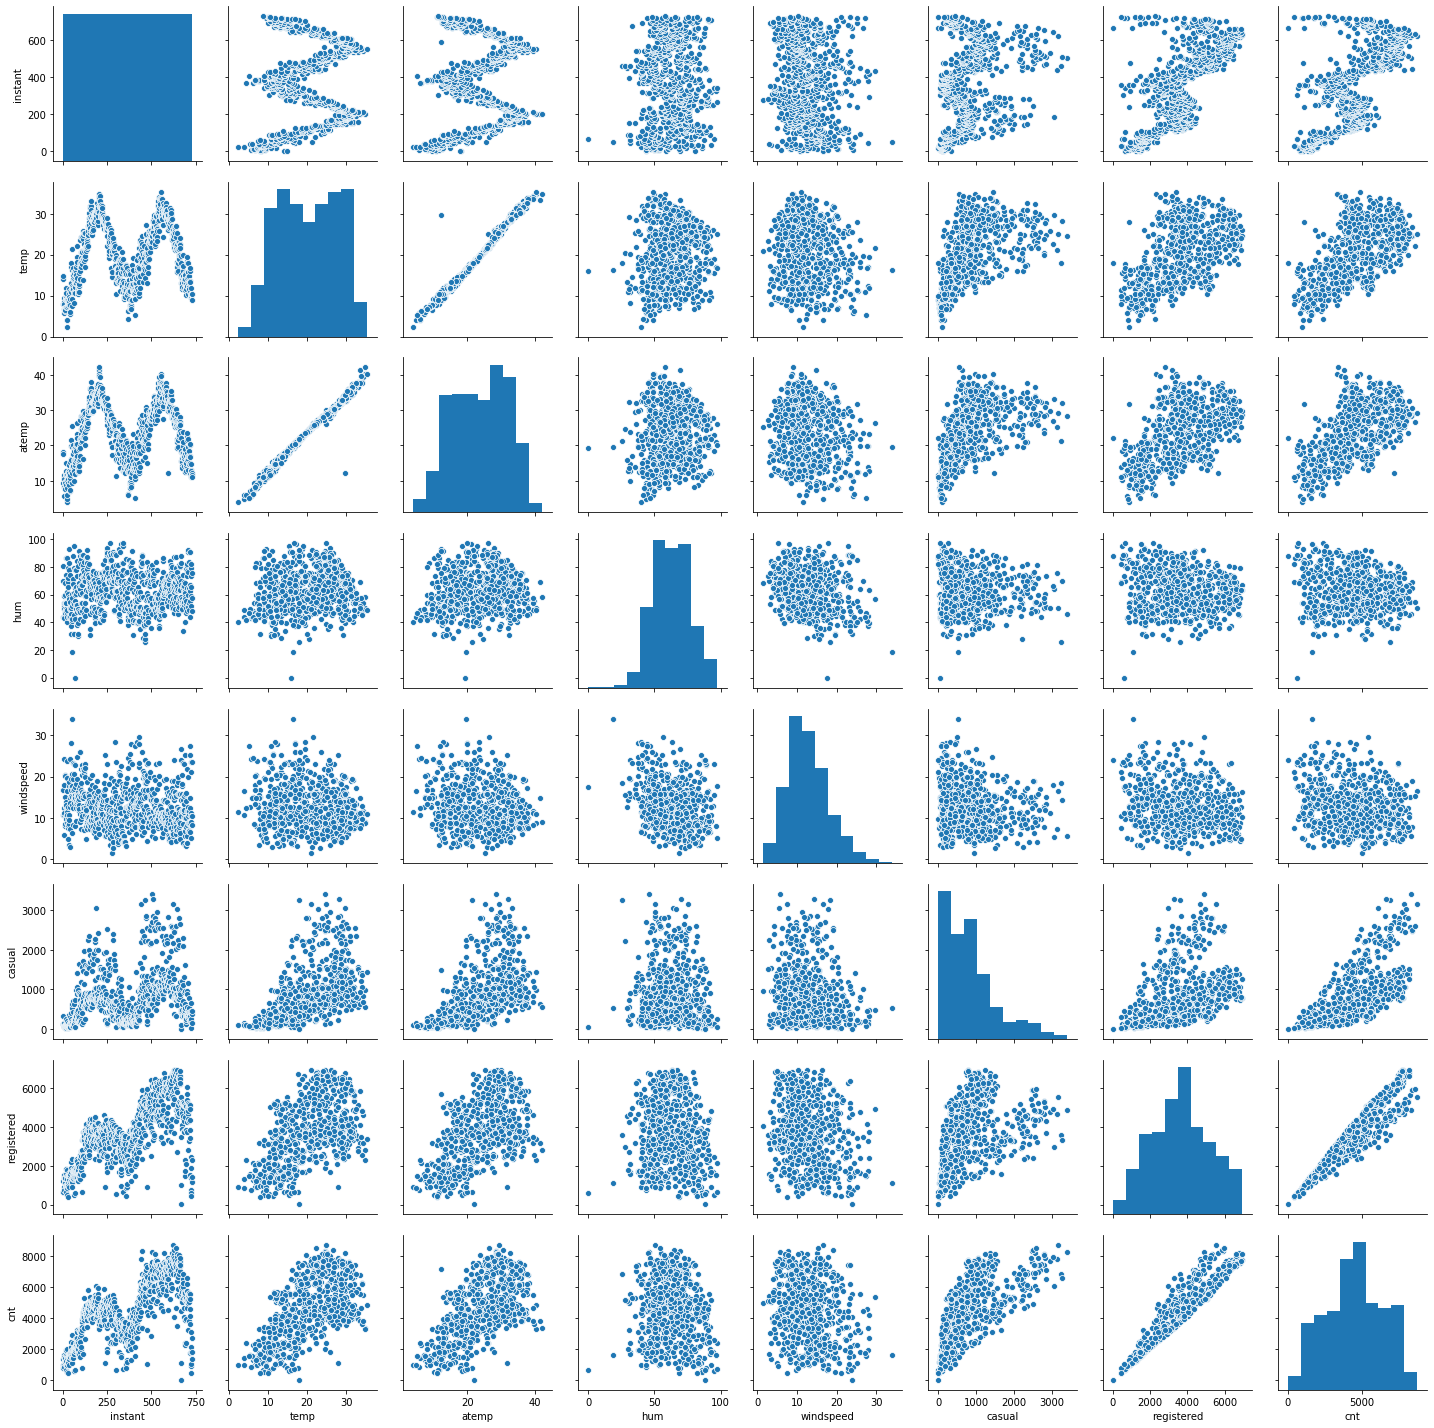

In [6]:
# Plotting a pair plot of all the numerical variables to check the trends between the variables in dataset
num_vars = ['instant', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
sns.pairplot(shared_bike_data[num_vars])
plt.show()

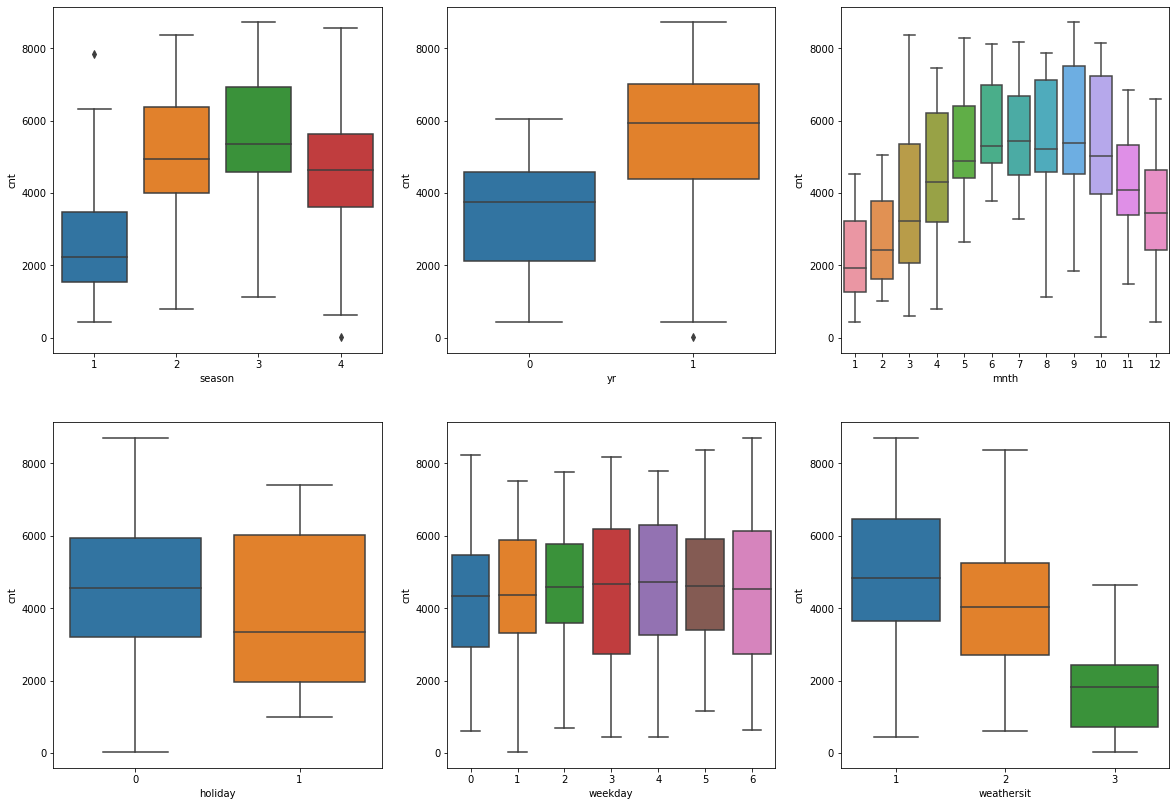

In [7]:
# Plotting a box plot for all the categorical variables of the data set to get an idea of their influence on target variable
plt.figure(figsize=(20, 14))
plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt', data=shared_bike_data)
plt.subplot(2,3,2)
sns.boxplot(x='yr', y='cnt', data=shared_bike_data)
plt.subplot(2,3,3)
sns.boxplot(x='mnth', y='cnt', data=shared_bike_data)
plt.subplot(2,3,4)
sns.boxplot(x='holiday', y='cnt', data=shared_bike_data)
plt.subplot(2,3,5)
sns.boxplot(x='weekday', y='cnt', data=shared_bike_data)
plt.subplot(2,3,6)
sns.boxplot(x='weathersit', y='cnt', data=shared_bike_data)

In [8]:
## conclusions from above heatmap, paitplots and box plots
# 1. 'temp', 'atemp' are very highly correlated and also both conveys almost the same information trend , therefore considering only one of them.
# 2. 'instant' variable just being a index number it doesn't have any effect on the target variable, therefore removing 'instant' variable.
# 3. 'registered' and 'casual' variables are just partition of the target variable 'cnt' which will not influence the target varible, therefore removing 'registered' and 'casual' variables.
# 4. Since year, month and weekday information almost acts as a derived variables for 'dteday', therefore ignoring 'dteday' variable.

In [9]:
shared_bike_data.pop('temp')
shared_bike_data.pop('instant')
shared_bike_data.pop('dteday')
shared_bike_data.pop('registered')
shared_bike_data.pop('casual')
shared_bike_data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [10]:
# Splitting the dataset into train and test sets
data_train, data_test = train_test_split(shared_bike_data, train_size=0.7, random_state=100)
print(f' train data shape : {data_train.shape}, test data shape : {data_test.shape}')

 train data shape : (510, 11), test data shape : (220, 11)


In [11]:
# Rescaling the data using normalised scaling.
scalable_vars = ['season', 'mnth', 'weekday', 'weathersit', 'atemp', 'hum', 'windspeed', 'cnt']
scaler = MinMaxScaler()
data_train[scalable_vars] = scaler.fit_transform(data_train[scalable_vars])
data_train.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.504575,0.507843,0.503743,0.025490,0.498366,0.676471,0.201961,0.513156,0.650480,0.320883,0.513499
std,0.370078,0.500429,0.315038,0.157763,0.336182,0.468282,0.273944,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.181818,0.000000,0.166667,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420
50%,0.666667,1.000000,0.545455,0.000000,0.500000,1.000000,0.000000,0.529718,0.653714,0.296763,0.518638
75%,0.666667,1.000000,0.818182,0.000000,0.833333,1.000000,0.500000,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# split X_train and y_train
y_train = data_train.pop('cnt')
X_train = data_train

In [13]:
# Following bottom up approch of multiple linear regression model where we start from all the variables and at each iteration removing appropriate variable and rebuilding the model again.
# Iteration 1
X_train_sm = sm.add_constant(X_train)
# Need to add a constant as statsmodels by default don't have a constant
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     203.4
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          6.26e-169
Time:                        22:58:09   Log-Likelihood:                 453.20
No. Observations:                 510   AIC:                            -884.4
Df Residuals:                     499   BIC:                            -837.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1790      0.032      5.588      0.000       0.116       0.242
season         0.1412      0.024      5.908      0.000       0.094       0.188
yr             0.2352      0.009     26.041      0.000       0.217       0.253
mnth          -0.0160      0.027     -0.585      0.559      -0.070       0.038
holiday       -0.0670      0.029     -2.284      0.023      -0.125      -0.009
weekday        0.0486      0.013      3.611      0.000       0.022       0.075
workingday     0.0197      0.010      1.997      0.046       0.000       0.039
weathersit    -0.1571      0.021     -7.479      0.000      -0.198      -0.116
atemp          0.5092      0.023     21.686      0.000       0.463       0.555
hum           -0.1002      0.042     -2.414      0.016      -0.182      -0.019
windspeed     -0.1506      0.028     -5.296      0.000      -0.206      -0.095
==============================================================================
Omnibus:                       64.718   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.353
Skew:                          -0.665   Prob(JB):                     1.84e-34
Kurtosis:                       5.354   Cond. No.                         22.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# calculating VIF for all the variables
# Iteration 1
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
8,hum,15.74
2,mnth,13.27
0,season,11.26
7,atemp,8.28
9,windspeed,3.65
5,workingday,3.14
4,weekday,3.02
6,weathersit,2.19
1,yr,2.01
3,holiday,1.09


In [15]:
# From above VIF and p value observation we see that 'mnth' has high p value and high VIF value, therefore dropping 'mnth'
# Iteration 2
X = X_train.drop('mnth', axis=1)
# Need to add a constant as statsmodels by default don't have a constant
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     226.3
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          4.80e-170
Time:                        22:58:09   Log-Likelihood:                 453.03
No. Observations:                 510   AIC:                            -886.1
Df Residuals:                     500   BIC:                            -843.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1778      0.032      5.565      0.000       0.115       0.241
season         0.1295      0.013      9.869      0.000       0.104       0.155
yr             0.2353      0.009     26.088      0.000       0.218       0.253
holiday       -0.0678      0.029     -2.315      0.021      -0.125      -0.010
weekday        0.0481      0.013      3.585      0.000       0.022       0.075
workingday     0.0198      0.010      2.014      0.045       0.000       0.039
weathersit    -0.1561      0.021     -7.461      0.000      -0.197      -0.115
atemp          0.5104      0.023     21.845      0.000       0.465       0.556
hum           -0.1028      0.041     -2.492      0.013      -0.184      -0.022
windspeed     -0.1507      0.028     -5.306      0.000      -0.207      -0.095
==============================================================================
Omnibus:                       63.967   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.102
Skew:                          -0.658   Prob(JB):                     5.68e-34
Kurtosis:                       5.339   Cond. No.                         21.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# VIF for Iteration 2
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
7,hum,14.79
6,atemp,8.22
8,windspeed,3.64
0,season,3.40
4,workingday,3.14
3,weekday,3.00
5,weathersit,2.16
1,yr,2.01
2,holiday,1.09


In [17]:
# As High VIF indicates that a particular variable is correlated highly with other variables, because of high VIF value for 'hum', dropping it.
# Iteration 3
X = X.drop('hum', axis=1)
# Need to add a constant as statsmodels by default don't have a constant
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     251.2
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          6.34e-170
Time:                        22:58:09   Log-Likelihood:                 449.88
No. Observations:                 510   AIC:                            -881.8
Df Residuals:                     501   BIC:                            -843.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1155      0.020      5.779      0.000       0.076       0.155
season         0.1255      0.013      9.586      0.000       0.100       0.151
yr             0.2376      0.009     26.342      0.000       0.220       0.255
holiday       -0.0681      0.029     -2.315      0.021      -0.126      -0.010
weekday        0.0514      0.013      3.830      0.000       0.025       0.078
workingday     0.0202      0.010      2.048      0.041       0.001       0.040
weathersit    -0.1882      0.017    -11.354      0.000      -0.221      -0.156
atemp          0.4995      0.023     21.652      0.000       0.454       0.545
windspeed     -0.1307      0.027     -4.771      0.000      -0.184      -0.077
==============================================================================
Omnibus:                       62.218   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.512
Skew:                          -0.653   Prob(JB):                     6.87e-32
Kurtosis:                       5.246   Cond. No.                         12.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# VIF Iteration 3
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
6,atemp,5.87
7,windspeed,3.29
0,season,3.18
4,workingday,2.93
3,weekday,2.86
1,yr,2.00
5,weathersit,1.54
2,holiday,1.07


In [19]:
# Dropping 'workingday' for having a high p value (~ 0.05)
# Iteration 4
X = X.drop('workingday', axis=1)
# Need to add a constant as statsmodels by default don't have a constant
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     284.7
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          2.91e-170
Time:                        22:58:09   Log-Likelihood:                 447.76
No. Observations:                 510   AIC:                            -879.5
Df Residuals:                     502   BIC:                            -845.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1292      0.019      6.837      0.000       0.092       0.166
season         0.1244      0.013      9.479      0.000       0.099       0.150
yr             0.2381      0.009     26.315      0.000       0.220       0.256
holiday       -0.0819      0.029     -2.848      0.005      -0.138      -0.025
weekday        0.0506      0.013      3.755      0.000       0.024       0.077
weathersit    -0.1865      0.017    -11.226      0.000      -0.219      -0.154
atemp          0.5023      0.023     21.738      0.000       0.457       0.548
windspeed     -0.1326      0.027     -4.831      0.000      -0.187      -0.079
==============================================================================
Omnibus:                       67.756   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.167
Skew:                          -0.724   Prob(JB):                     4.06e-33
Kurtosis:                       5.219   Cond. No.                         10.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# VIF Iteration 4
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
5,atemp,5.36
0,season,3.18
6,windspeed,3.15
3,weekday,2.83
1,yr,1.98
4,weathersit,1.52
2,holiday,1.03


In [21]:
# As we see after the 4 th iteration we see acceptable p values and VIF values for the variables, therefore this can be fixed as our final model

Index(['const', 'season', 'yr', 'holiday', 'weekday', 'weathersit', 'atemp',
       'windspeed'],
      dtype='object')


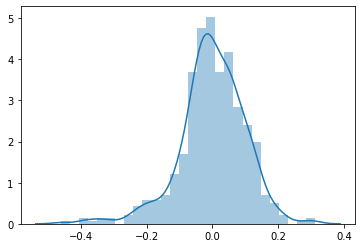

In [22]:
## Residual Analysis
print(X_train_sm.columns)
y_train_pred = lr_model.predict(X_train_sm)
res = y_train - y_train_pred
sns.distplot(res)

In [23]:
# Scaling the variables same as the scale factor done for training set.
data_test[scalable_vars] = scaler.transform(data_test[scalable_vars])
data_test.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.487879,0.481818,0.499174,0.036364,0.502273,0.700000,0.186364,0.532847,0.638221,0.313293,0.522154
std,0.370602,0.500809,0.311120,0.187620,0.330843,0.459303,0.269102,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.272727,0.000000,0.166667,0.000000,0.000000,0.344870,0.529197,0.198843,0.378595
50%,0.333333,0.000000,0.454545,0.000000,0.500000,1.000000,0.000000,0.544652,0.625590,0.300126,0.524678
75%,0.666667,1.000000,0.727273,0.000000,0.833333,1.000000,0.500000,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300


In [24]:
## Prediction on test set
y_test = data_test.pop('cnt')
X_test = data_test
X_test_sm = sm.add_constant(X_test)
X_test_sm = X_test_sm.drop(['hum', 'mnth', 'workingday'], axis=1)
y_test_pred = lr_model.predict(X_test_sm)

In [25]:
## Evaluation of the predictions done with the help of our model
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7815289564483857